# 0. Conditional probabilities and Bayes theorem

$P(Y|X)$ - Y happens is X happened
What it does - it simply narrows down a set of possibilities

Example. Take a number of 1 to 10; Y - number is full square (1, 4 or 9). $P(Y)=3/10=0.3$. $X$ - number is even (2,4,6,8,10). $P(Y|X)=1/5=0.2$.

Events $X$ and $Y$ are independent if and only if $P(Y|X)=P(Y)$.

Multiplication rule
$$
P(X \cap Y)=P(Y|X)P(X)
$$
In case of independent events
$$
P(X \cap Y)=P(X)P(Y)
$$
However then
$$
P(Y|X)P(X)=P(X \cap Y)=P(X|Y)P(Y)
$$
meaning that
$$
P(X|Y)=\frac{P(Y|X)P(X)}{P(Y)}
$$
Selecting an even number if we selected a full square is $1/3=1/5*5/10/(3/10)$.

Summation rule
$$
P(Y)=P(Y\cap X)+P(Y\cap \overline{X})=P(Y|X)P(X)+P(Y|\overline{X})P(\overline{X})
$$

Example. Breast cancer diagnosis is $80\%$ accurate. Also rate of false alarms is $10\%$. What is the level of confidence that a patient who got a positive test actually has cancer if the overall cancer rate among this group is $0.05\%$.

Hint: use 
$
P(c=1|d=1)=P(d=1|c=1)P(c=1)/P(d=1)
$
and
$
P(d=1)=P(d=1|c=0)P(c=0)+ P(d=1|c=1)P(c=1)
$

Aswer:4%

# 1. Discrete distributions
## 1.1. Mean and variance

While random event has two possible outcomes - happened or not, the discrete random variable generalize that admitting a certain finite set of possible outcomes, for example integer numbers.

Examples: 1) Rolling a dice, 2) Rolling two dices and computing their sum.



Mean:
$$\mu=E[X]=\sum_k P(X=k)k$$
Variance:
$$\sigma^2=var[X]=E[(X-E[X])^2]=\sum_k P(X=k)(k-\mu)^2$$
Standard deviation:
$$\sigma[X]=\sqrt{var[E]}=\sqrt{\sum_k P(X=k)(k-\mu)^2}$$
Coefficient of variation:
$$
c_v=\frac{\sigma}{\mu}
$$
A corollary:
$$
E[X^2]=\sum_k P(X=k)k^2=\sum_k P(X=k)(k-\mu)^2+2\mu\sum_k P(X=k)k-\mu^2\sum_k P(X=k)=$$
$$\sigma^2+2\mu^2-\mu^2=\mu^2+\sigma^2.$$

$$
E[X+Y]=E[X]+E[Y]
$$$$
E[a X]=aE[X], var[aX]=a^2 var[X]
$$

If two variables are independent (i.e. $P(Y=y|X=x)=P(Y=y)$).
$$
E[XY]=E[X]E[Y]
$$$$
var[X+Y]=var[X]+var[Y]
$$$$
var[X-Y]=var[X]+var[-Y]=var[X]+var[Y]
$$

In [2]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
x=np.array(range(1,7))
p=np.array([1.0/6]*6)
mu=sum(p*x)
sigma2=sum(np.square(x-mu)*p)
print('Mean={0}'.format(mu))
print('Variance={0}'.format(sigma2))

Mean=3.5
Variance=2.91666666667


[0 0 1 2 3 4 5 6 5 4 3 2 1]


<Container object of 13 artists>

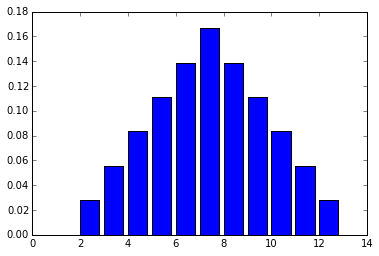

In [6]:
p=np.array([0]*13)
for i in range(1,7):
    for j in range(1,7):
        p[i+j]=p[i+j]+1
print(p)
p=p/1.0/sum(p)
s=np.array(range(0,13))
plt.bar(s,p)

In [4]:
mu=sum(s*p)
sigma2=sum(np.square(s-mu)*p)
print('Mean={0}'.format(mu))
print('Variance={0}'.format(sigma2))

Mean=7.0
Variance=5.83333333333


## 1.2. Bernoulli distribution
Flipping a coin or any other random event happening with a probability $p$:
$$
Bern(X=1|p)=p
$$$$
Bern(X=0|p)=1-p
$$$$
\mu=E[X]=1\cdot Bern(X=1|p)+0\cdot Bern(X=0|p)=p
$$$$
\sigma=\sqrt{(1-\mu)^2 Bern(X=1|p)+(0-\mu)^2 Bern(X=0|p)}=\sqrt{(1-p)^2+p^2(1-p)}=\sqrt{p(1-p)}.
$$

In [5]:
random.seed(2015)
sample = stats.bernoulli.rvs(p = 0.7, size = 50)
print(sample)
sum(sample)

[0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 1 1 0 1 1]


37

In [6]:
counts=[]
for i in range(0,10000):
    sample = stats.bernoulli.rvs(p = 0.7, size = 50)
    counts.append(sum(sample))
print(counts[0:100])

[38, 31, 31, 27, 34, 36, 36, 36, 31, 38, 33, 34, 34, 44, 35, 30, 39, 37, 36, 37, 30, 33, 32, 34, 37, 30, 38, 34, 29, 33, 33, 33, 38, 39, 34, 41, 36, 36, 34, 23, 38, 36, 39, 31, 38, 34, 39, 35, 37, 36, 41, 34, 30, 34, 36, 28, 42, 39, 35, 32, 40, 37, 32, 35, 32, 38, 35, 33, 35, 29, 40, 34, 38, 32, 40, 32, 36, 34, 42, 36, 39, 34, 36, 39, 37, 41, 33, 32, 30, 34, 33, 34, 36, 37, 37, 33, 36, 37, 38, 36]


Mean=34.9582
Standard deviation=3.21335537406


<Container object of 25 artists>

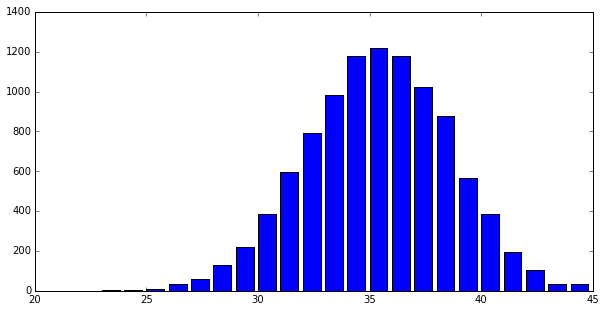

In [7]:
print('Mean={0}'.format(mean(counts)))
print('Standard deviation={0}'.format(std(counts)))
h=np.histogram(counts,range=(20,45),bins=25)
plt.figure(figsize = (10,5))
plt.bar(h[1][0:-1],h[0])

## 1.3. Binomial distribution
Number of successes of a series of random events
$$
Bin(X=k|n,p)=C^k_n p^k (1-p)^{n-k},
$$$$
C^k_n=\frac{n!}{(n-k)!k!}
$$$$
\mu=E[X]=pn
$$$$
\sigma[X]=\sqrt{np(1-p)}
$$

In [7]:
p=0.7
n=50
mu=p*n
sigma=sqrt(n*p*(1-p))
print('Mean={0}'.format(mu))
print('Standard deviation={0}'.format(sigma))
print(stats.binom.pmf(37, p=p, n=n))

Mean=35.0
Standard deviation=3.2403703492
0.105017451475


<Container object of 25 artists>

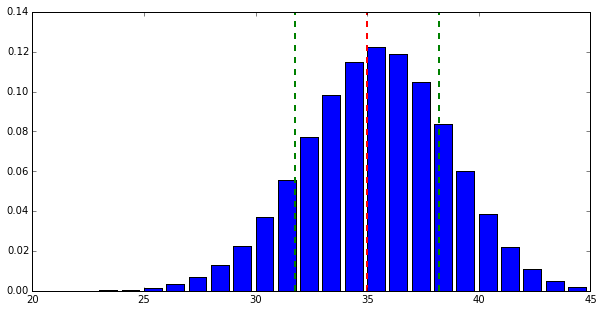

In [9]:
plt.figure(figsize = (10,5))
k=range(20,45)
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
plt.bar(k,stats.binom.pmf(k, p=0.7, n=50))

## 1.4. Poisson distribution
Number of events happening with a certain frequency $\lambda$ (like device failures, crime, disasters)
$$
Poi(X=k|\lambda)=e^{-\lambda}\frac{\lambda^k}{k!}
$$$$
E[X]=var[X]=\lambda=\mu=\sigma^2
$$

Example: New house construction permits issued in Staten Island average at 700 per year. Assume construction permits are requested at a homogenous rate over time, i.e. their number follows Poisson distribution

Standard deviation range=(673,726), probability=0.692567740903


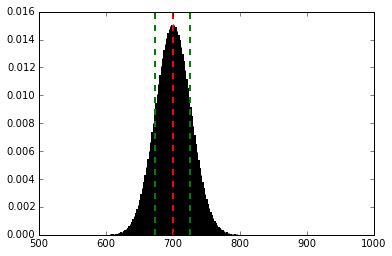

In [10]:
plt.figure()
k=range(500,1000,2)
mu=700
sigma=sqrt(mu)
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
plt.bar(k,stats.poisson.pmf(k, mu=mu))
p=sum(stats.poisson.pmf(range(int(mu-sigma),int(sigma+mu+1)), mu=mu))
print('Standard deviation range=({0},{1}), probability={2}'.format(int(mu-sigma),int(sigma+mu),p))

Example: 25 named hurricanes hit Bermuda during 22 years from 1991 till 2012. Given this statistics, what is the probability of getting at least 3 hurricanes during the same year (it actually happened in 1998)?

0.107014227808


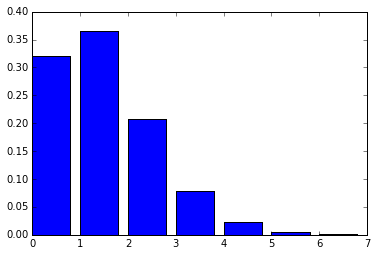

In [11]:
plt.figure()
k=range(0,7)
mu=25.0/22
plt.bar(k,stats.poisson.pmf(k, mu=mu))
print(1-sum(stats.poisson.pmf(range(0,3), mu=mu)))

# 2. Continous distributions

$X$ is real-valued and is characterized by a non-decreasing $F(x)=P(X\leq x)$ valued between 0 and 1.
$$
P(a\leq X\leq b)=F(b)-F(a)
$$
If $F$ is differentiable then its derivative 
$$
p(x)=F'(x)=\lim\limits_{\Delta x\to 0}\frac{P(x\leq X\leq x+\Delta x)}{\Delta x}
$$ 
is called a probability density function. 
$$
P(a\leq X\leq b)=\int\limits_a^b p(x)dx
$$

## 2.1. Mean and variance, quantiles

Mean:
$$
\mu=E[X]=\int\limits_x x p(x)dx=\int x d P
$$
Variance:
$$
\sigma^2=var[X]=E[(X-E[X])^2]=\int\limits_x (x-\mu)^2 p(x)dx
$$
Quantile:
$$
x_\alpha=F^{-1}(\alpha); P(X\leq x_\alpha)=\alpha
$$
$$
E[X+Y]=E[X]+E[Y]
$$$$
E[qX]=qE[X]; var[qX]=q^2 var[X].
$$
The following holds for independent variables X and Y only (i.e. $P(Y=y|X=x)=P(Y=y)$)
$$
var[X+Y]=var[X]+var[Y], \sigma[X+Y]=\sqrt{\sigma[X]^2+\sigma[Y]^2}.
$$$$
E[XY]=E[X]E[Y]
$$

## 2.2. Uniform distribution

Random variable uniformly distributed over a certain interval
$$
Unif(x|a,b)=\frac{1}{b-a} I(a\leq x\leq b)
$$
$$
\mu=E[X]=\frac{a+b}{2}
$$$$
\sigma[X]=\frac{(b-a)}{2\sqrt{3}}
$$

(0, 1.1)

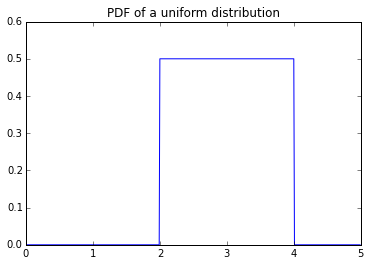

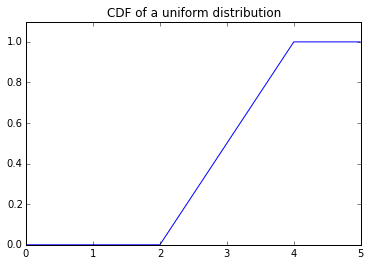

In [12]:
plt.figure()
x=np.array(range(0,500))*0.01
a=2
b=4
w=b-a
plt.title('PDF of a uniform distribution')
plt.plot(x,stats.uniform.pdf(x,a,w))
plt.ylim([0,0.6])
plt.figure()
plt.title('CDF of a uniform distribution')
plt.plot(x,stats.uniform.cdf(x,a,w))
plt.ylim([0,1.1])

## 2.3. Normal distribution

A very common continous distribution - happens to represent a number of real-world processes (physics, biology, sociology, economics etc): characteristics of people and animals, errors of astronomical observations, income etc.

### Central limit theorem: 
a sample average $\overline{X}=\frac{\sum\limits_i X_i}{N}$ of a random sample of N instances ${X_1,X_2,...,X_N}$ of a random variable $X$ ($E[X]=\mu$, $std[X]=\sigma$) has a distribution close to normal ${\cal N}(\overline{X}|\mu,\sigma^2/N)$ for large $N$. 

Rigorously
$$
\sqrt{N}(\overline{X}-\mu)\to {\cal N}(0,\sigma^2),
$$
while $N\to\infty$.

Probability density function:
$$
{\cal N}(X=x|\mu,\sigma^2)=\phi(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Cumulative distribution function
$$
\Phi(x|\mu,\sigma^2)=\int\limits_{-\infty}^x \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(t-\mu)^2}{2\sigma^2}}dt
$$

Sum of independent normally distributed random variables is also normally distributed.

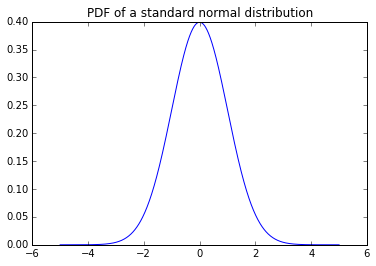

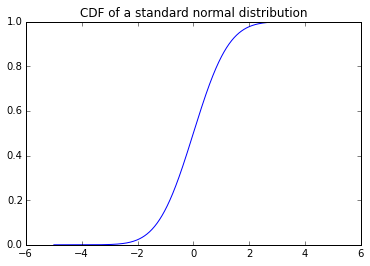

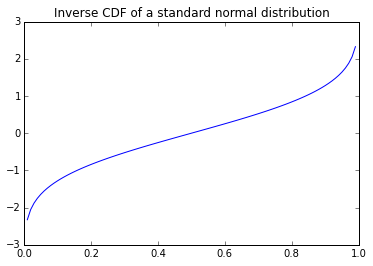

In [13]:
plt.figure()
x=np.array(range(-500,501))*0.01
plt.title('PDF of a standard normal distribution')
plt.plot(x,stats.norm.pdf(x,0,1))
plt.figure()
plt.title('CDF of a standard normal distribution')
plt.plot(x,stats.norm.cdf(x,0,1))
plt.figure()
plt.title('Inverse CDF of a standard normal distribution')
x=np.array(range(0,101))*0.01
plt.plot(x,stats.norm.ppf(x,0,1))

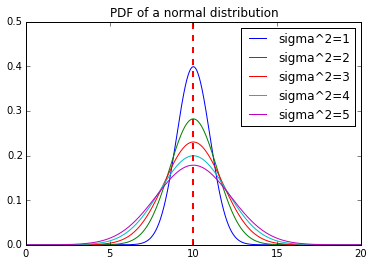

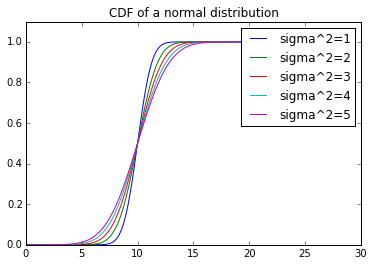

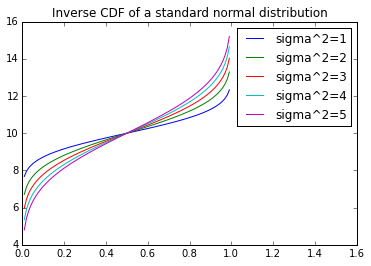

In [14]:
plt.figure()
x=np.array(range(0,2000))*0.01
mu=10
plt.title('PDF of a normal distribution')
for sigma2 in range(1,6):
    plt.plot(x,stats.norm.pdf(x,mu,sqrt(sigma2)),label='sigma^2={0}'.format(sigma2))
plt.legend()
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.ylim([0,0.5])
plt.figure()
plt.title('CDF of a normal distribution')
for sigma2 in range(1,6):
    plt.plot(x,stats.norm.cdf(x,mu,sqrt(sigma2)),label='sigma^2={0}'.format(sigma2))
plt.ylim([0,1.1])
plt.xlim([0,30])
plt.legend()
plt.figure()
plt.title('Inverse CDF of a standard normal distribution')
x=np.array(range(0,101))*0.01
plt.xlim([0,1.6])
for sigma2 in range(1,6):
    plt.plot(x,stats.norm.ppf(x,mu,sqrt(sigma2)),label='sigma^2={0}'.format(sigma2))
plt.legend()

But in spite of visual variaty of forms, actually all the normally distributed variables $X\sim {\cal N}(\mu,\sigma)$ could be easily derived from a single standard normal distritution $X_0\sim {\cal N}(0,1)$ as following: $X=X0\sigma+\mu$.

So knowing properties of ${\cal N}(0,1)$ we can easily judge about all ${\cal N}(\mu,\sigma)$. For example good to remember the scale of quantiles:

In [15]:
print(stats.norm.ppf(0.95,0,1))
print(stats.norm.ppf(0.99,0,1))
print(stats.norm.ppf(0.999,0,1))

1.64485362695
2.32634787404
3.09023230617


So if for example daily energy usage of the building is known to be normally distributed with a mean of $\mu=10Mwh$ and standard deviation $\sigma=3MWh$, and we want to plan an energy supply system which will have enough capacity to satisfy hourly demand in $99.9\%$ of cases, then it's maximal capacity should be planned as approx $10+3*3=19Mwh$.

In many real-world cases not the quantity considered but rather its logarithm happens to be distributed normally (e.g. activity of customers, population of cities etc)
### lognormal distribution: 
$log(X)\sim {\cal N}(\mu,\sigma^2)$

(0, 1.1)

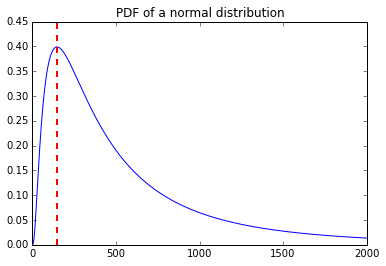

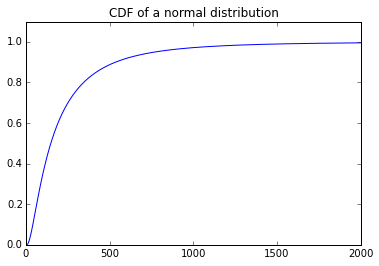

In [16]:
plt.figure()
x=np.array(range(1,2000))*1.0
mu=5
sigma=1
plt.title('PDF of a normal distribution')
plt.plot(x,stats.norm.pdf(log(x),mu,sigma))
plt.axvline(exp(mu), color='r', ls='--', lw=2.0)
plt.ylim([0,0.45])
plt.figure()
plt.title('CDF of a normal distribution')
plt.plot(x,stats.norm.cdf(log(x),mu,sigma))
plt.ylim([0,1.1])

## 2.4. Other useful distributions

### Logistic distribution

Probability Density Function
$Logist(X=x)=F^\prime(x)=\displaystyle{\frac{\exp(-x)}{1+\exp(-x)}}$

Cumulative Density Function
$F(x)=\displaystyle{\frac{1}{1+\exp(-x)}}$

$$
\mu=E[X]=0, \sigma[X]=\pi/\sqrt{3}.
$$

### Exponential distribution

Probability Density Function
$$
Exp(X=x|\lambda)=\left\{\begin{array}{ll}\lambda e^{-\lambda x}, & x\geq 0\\0,& x<0 \end{array}\right.
$$

Cumulative Density Function
$$
F(x)=\left\{\begin{array}{ll}1-e^{-\lambda x}, & x\geq 0\\0, & x<0\end{array}\right.
$$

$$
\mu=E[X]=\sigma[X]=1/\lambda
$$

### Laplace distibution

Another related distribution is:

$$
Laplace(X=x|\mu,\sigma)=\frac{1}{\sqrt{2}\sigma}e^{-\frac{\sqrt{2}|x-\mu|}{\sigma}}
$$

If $X\sim Laplace$ then $|X-E[X]|\sim Exp$. Also difference between two identically distributed exponential random variables follows a Laplace distribution. 

### Pareto distribution

$$
Pareto(X=x|x_m,\alpha)=\left\{\begin{array}{ll}\frac{\alpha x_m^\alpha}{x^{\alpha+1}}, & x\geq x_m,\\
0, & x<x_m.\end{array}\right.
$$

Continous version of often observed discrete power-law distributions, like Zipf law.

### Gamma and Beta distributions:
$$
Gamma (X=x|\alpha,\beta)=\frac{\beta^\alpha x^{\alpha-1} e^{-x\beta}}{\Gamma(\alpha)}
$$$$
Beta(X=x|\alpha,\beta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
$$

# 3 Sample distributions

Often instead of knowing the law of the random variable's $X$ distribution we have a sample of it's observations: $X_1,X_2,...,X_N$. In this case distribution parameters are simply estimated as:
$$
\mu=E[X]=\frac{\sum\limits_{j=1}^N X_j}{N},
$$$$
\sigma^2=var[X]=\frac{\sum\limits_{j=1}^N (X_j-\mu)^2}{N}.
$$

Consider a sample of individual house sale prices in one of the zip codes in Queens: 11412.

[ 260000.  389500.  275600.  280000.  243360.  390370.  329000.  410000.
  280000.  415000.]
Mean=326267.647327
Standard deviation=103186.979881


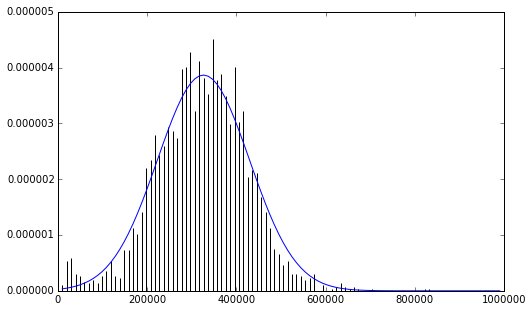

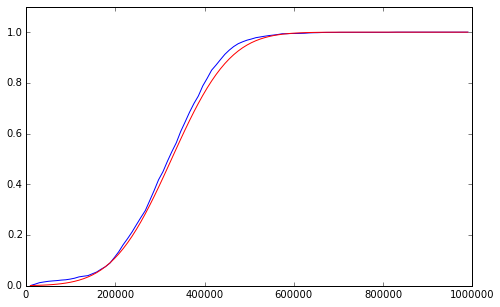

In [17]:
# Import urllib to import data from a url
import urllib
url = "https://serv.cusp.nyu.edu/files/ADS-2015/FridayBootCamp/NYC_RE/NYC_RE_11412_single.csv"
f = urllib.urlopen(url)
prices = np.loadtxt(f)
print(prices[0:10])
mu=mean(prices)
sigma=std(prices)
print('Mean={0}'.format(mu))
print('Standard deviation={0}'.format(sigma))
h=np.histogram(prices,range=(1e4,1e6),bins=100)
plt.figure(figsize = (8,5))
plt.bar(h[1][0:-1],h[0]/9900.0/sum(h[0]))
x=h[1][0:-1]
#x=np.array(range(10000,1000000,10000))
plt.plot(x,stats.norm.pdf(x,mu,sigma))
cumdistr = np.cumsum(h[0], axis=0)
plt.figure(figsize = (8,5))
plt.ylim(0,1.1)
plt.plot(x,cumdistr*1.0/cumdistr[-1])
plt.plot(x,stats.norm.cdf(x,mu,sigma),'r')

# 4. Correlation

Covarience:
$$
cov(X,Y)=E[(X-E[X])(Y-E[Y])]
$$
Pearson’s correlation coefficient:
$$
corr(X,Y)=\frac{cov(X,Y)}{\sigma[X] \sigma[Y]} 
$$

Now again consider a real estate prices example, this for multi-apartments houses in Bronx's zip code 10466, and see how they are correlated with the building square footage.

Correlation=0.92647798714


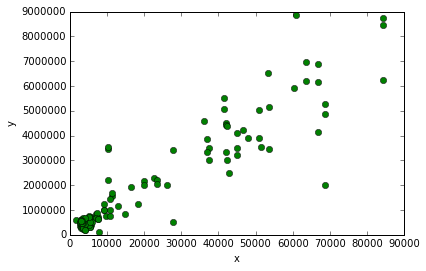

In [19]:
from scipy.stats.stats import pearsonr
url = "https://serv.cusp.nyu.edu/files/ADS-2015/FridayBootCamp/NYC_RE/NYC_RE_10466_multi.csv"
f = urllib.urlopen(url)
prices = np.loadtxt(f,delimiter=",")
x=prices[:,0]
y=prices[:,1]
corr=pearsonr(x,y)[0]
print('Correlation={0}'.format(corr))
plt.figure()
plt.plot(x,y,'og')
plt.xlabel('x')
plt.ylabel('y')

# 5. Optimization


### Quantiles - optimization example

Consider a protective damb construction problem. Let maximal hight of a storm surge ecountered per period of damb usage to be a normally distributed random value $H\sim {\cal N}(10,3^2)$, ft, a cost of a protective damb erection depend on its hight $h$ as $C(h)=\$10M+\$1M\cdot h^2$ while expected amount of loss is damb protective capacity is exceeded - $L=\$1B$. What is the optimal hight $h^*$ of the damb and how reliable this dumb should be? 

Let $\alpha$ be a reliability of the damb, i.e. $1-\alpha$ be a probability of its failure. Then $h^*(\alpha)=\Phi^{-1}(\alpha|10,3^2)$ is the damb hight which will provide damp reliability with the confidence level $\alpha$ (as before $99.9\%$ reliability is acheived for an approximately $10+3*3=19$ ft damb), average expectation for the loss is $(1-\alpha) L$, while cost of the damb erection is $C(h^*)$. Then optimal hight should minimize the total expence estimated as
$$
C(h^*(\alpha))+(1-\alpha) L\to min
$$

alpha=0.957
h*=15.1506580553


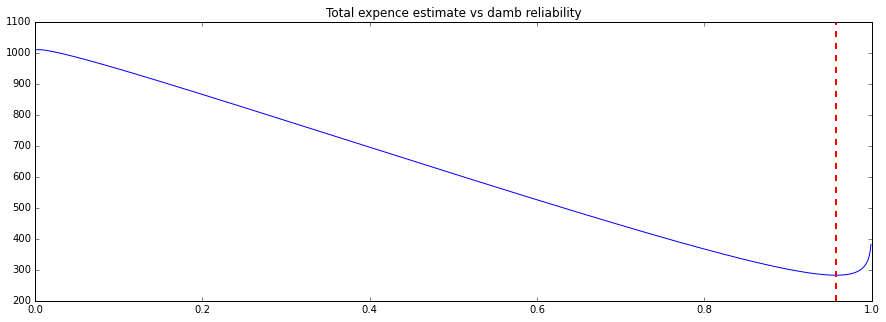

In [20]:
def C(h):
    return 10+power(h,2)

def h(a):
    return stats.norm.ppf(a,10,3)

def total(a):
    return C(h(a))+(1-a)*1000

x=np.array(range(0,1000))*0.001
y=map(total,x)
plt.figure(figsize = (15,5))
plt.title('Total expence estimate vs damb reliability')
plt.plot(x,y)
a0=x[np.argmin(y)]
print('alpha={0}'.format(a0))
print('h*={0}'.format(h(a0)))
plt.axvline(a0, color='r', ls='--', lw=2.0)


Optimization problem:
$$
F(x)\to min
$$

$$
x^*=argmin_X F(x)
$$

Common family of iterative optimization methods is known as "gradient descent":

$$
x^{j+1}=x^j-\lambda_j \triangledown F(x^j),
$$

where $\lambda_j$ are certain real numbers picked up with respect to $F(x^{j+1})<F(x^j)$.

### More complex optimization example. 
Consider several points on the map

(0, 10)

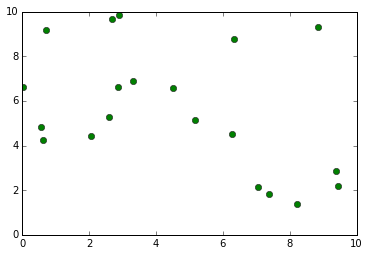

In [21]:
random.seed(2015)
x=stats.uniform.rvs(0,10,20)
y=stats.uniform.rvs(0,10,20)
plt.figure()
plt.plot(x,y,'go')
plt.xlim(0,10)
plt.ylim(0,10)

and look for a such a location that sum of square distances from it to the given points is minimal:
$$
\sum\limits_i \left[(x_i-x^*)^2+(y_i-y^*)^2\right]\to min
$$

[ 1.54807235  7.2780481 ]
[ 1.81483674  5.57769538]
[ 4.22443608  4.65999087]
[ 4.47771017  5.67534706]
[ 4.49791062  5.60316033]
[ 4.54311067  5.61177756]
[ 4.54949746  5.61196068]
[ 4.54950069  5.61180504]
[ 4.54923274  5.61200766]
[ 4.54870571  5.61188857]
[ 4.54874369  5.61179591]
[ 4.54874739  5.61179683]


  status: 1
 success: True
    nfev: 67
     fun: 331.24849585880349
       x: array([ 4.54874739,  5.61179683])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
     jac: array([-0.00293312, -0.00086402])
     nit: 12

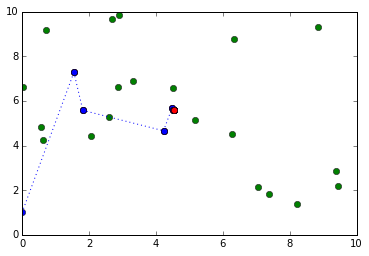

In [22]:
from scipy.optimize import minimize

def f(params):
    x0=params[0]
    y0=params[1]
    return sum(np.square(x-x0))+sum(np.square(y-y0))

plt.figure()
plt.plot(x,y,'go')
plt.xlim(0,10)
plt.ylim(0,10)
prevpoint=[0, 1];

def visiter(params):
    global prevpoint
    plt.plot([prevpoint[0],params[0]],[prevpoint[1],params[1]],'b:o')
    plt.plot(params[0],params[1],'ro')
    prevpoint=params
    print(params)
    
    

minimize(f, prevpoint, method='TNC', options={'disp': True}, callback=visiter)